<a href="https://colab.research.google.com/github/i-SanMartin/FastAI/blob/main/NN_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torch
!pip install -Uqq fastbook
import fastbook

     |████████████████████████████████| 727kB 4.5MB/s 
     |████████████████████████████████| 1.2MB 35.3MB/s 
     |████████████████████████████████| 194kB 42.1MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 776.8MB 20kB/s 
     |████████████████████████████████| 12.8MB 31.3MB/s 
     |████████████████████████████████| 61kB 4.6MB/s 
     |████████████████████████████████| 51kB 3.8MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.


In [3]:
import torch
from fastai.vision.all import *
from fastbook import *

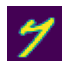

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
path.ls()
(path/'train').ls()
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
stacked_sevens = torch.stack(seven_tensors[0: 600]).float()/255
stacked_threes = torch.stack(three_tensors[0: 600]).float()/255
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([3]*600 + [7]*600).unsqueeze(1)
show_image(stacked_sevens[1]*255)

In [60]:
class Net:
  cats = []
  lys = []
  biases = []
  def __init__(self, arch, input_size, cates):
    self.cats.clear()
    self.cats = cates
    #Clear weights and bias
    self.lys.clear()
    self.biases.clear()

    _ly = 0#Save previous layer
 
    for i, ly in enumerate(arch) :
      if i == 0:
        self.lys.append(torch.rand(ly, input_size) - 0.5)
      else:
        self.lys.append(torch.rand(ly, _ly) - 0.5)

      self.biases.append(torch.rand(ly) - 0.5)
      _ly = ly
    

  def predict(self, input_data):
    
    output = torch.tensor(input_data)
    for ly, bias in zip(self.lys, self.biases):
      output = torch.sigmoid(output @ ly.T +bias)
    return output

  def loss_f(self, out, train_labels): return torch.sqrt(torch.square(1 - out[0]))

  def train(self, train_data, train_labels):
    out = self.predict(train_data)
    lys.requires_grad_()
    biases.requires_grad_()
    yt = self.loss_f(out, train_data, train_labels)
    yt.backward()
      



In [55]:
architecture = [8, 6, 4, 2]
net = Net(architecture, 2, [3, 7])
net.lys, net.biases

([tensor([[-0.3585, -0.1888],
          [ 0.4130,  0.0512],
          [-0.3739,  0.0031],
          [-0.3883, -0.1095],
          [-0.1375,  0.4328],
          [ 0.1549, -0.0872],
          [ 0.0845, -0.1443],
          [ 0.1965,  0.1978]]),
  tensor([[ 0.1481, -0.1704,  0.2539,  0.4290, -0.4904, -0.0619, -0.3410,  0.0932],
          [ 0.2068, -0.1033, -0.0418,  0.2251, -0.0840, -0.4199,  0.4001, -0.2517],
          [-0.0549,  0.0472, -0.0300, -0.4703,  0.2294, -0.2271, -0.2593,  0.1195],
          [-0.2609, -0.2311, -0.1685, -0.1878, -0.2088, -0.1348,  0.1299, -0.4046],
          [-0.3026,  0.0073,  0.0695,  0.2761, -0.3512,  0.1596,  0.2842,  0.2776],
          [-0.4657, -0.1908, -0.4298, -0.3164,  0.2785, -0.0747,  0.2124, -0.2935]]),
  tensor([[ 1.6518e-03,  4.7474e-01,  2.4269e-01, -2.6677e-01,  6.7244e-03, -5.4824e-02],
          [-4.0254e-01,  3.9205e-01,  8.0603e-03,  1.0530e-01, -2.0191e-01, -2.3396e-01],
          [ 8.2445e-02,  1.8486e-01,  1.1215e-01, -2.4097e-01,  4.8545e-

In [56]:
data = torch.randn(4,2)*2
data.requires_grad_()
data

tensor([[ 2.2903,  1.2192],
        [-0.5365, -2.3577],
        [ 1.7291, -1.3152],
        [-0.1886,  2.8644]], requires_grad=True)

In [67]:
res = net.predict(data)
res

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


tensor([[0.6741, 0.6565],
        [0.6731, 0.6550],
        [0.6734, 0.6559],
        [0.6746, 0.6562]])

In [68]:
labels = torch.tensor([3]*4).unsqueeze(1)
labels

tensor([[3],
        [3],
        [3],
        [3]])

In [69]:
net.loss_f(res, labels)

tensor([0.3259, 0.3435])

In [61]:
net.train(train_x,train_y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


RuntimeError: ignored